<a href="https://colab.research.google.com/github/huzaifa003/trial/blob/master/re_new_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import string
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_excel('/content/final 1 dataset frs excle.xlsx')
data

,Projects,Raw Requirements,Requiremnet Name,Type,Requirement with Standard Syntax,Assumption,type,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,NaN
0,PR-01,The Game must be developed using the Unity Gam...,Game Engine,Ubiquitous,The game shall be developed using unity game e...,NaN,ubiquitous,The game shall be developed using unity game e...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PR-01,The Game must be programmed using the C# langu...,Language,Ubiquitous,The game shall be written in C# and use Unity ...,NaN,ubiquitous,The game shall be written in C# and use Unity ...,NaN,NaN,NaN,NaN,NaN,NaN
3,PR-01,The Game must feature accurate sound effects a...,Audio,Ubiquitous,The Game shall feature accurate sound effects ...,NaN,ubiquitous,The Game shall feature accurate sound effects ...,NaN,NaN,NaN,NaN,NaN,NaN
4,PR-01,The Game must be playable at 720p resolution o...,Video,Event-Driven,When the game have 720p resoulution moitor scr...,NaN,state driven,"while the game have 720p resolution, the game ...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9674,PR-315,The client will also be able to view annotatio...,View Annotations,Ubiquitous,The system shall enable client to view annotat...,NaN,state driven,"while there is 3D model,The system shall enabl...",NaN,NaN,NaN,NaN,NaN,NaN
9675,PR-315,The clients will be able to view the descripti...,View Description,Ubiquitous,The system shall enable client to view the des...,NaN,event driven,"when the description of the label is tapped,Th...",NaN,NaN,NaN,NaN,NaN,NaN
9676,PR-315,The client will be able to rotate the 3D objec...,Rotation,Ubiquitous,The system shall enable client to rotate the 3...,NaN,ubiquitous,The system shall enable client to rotate the 3...,NaN,NaN,NaN,NaN,NaN,NaN
9677,PR-315,The client will be able to zoom in and zoom ou...,Scaling,Ubiquitous,The system shall enable client to zoom in and ...,NaN,state driven,"while there is 3D model,The system shall enabl...",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data = data[[' type', 'Unnamed: 7']]
data

,type,Unnamed: 7
0,ubiquitous,The game shall be developed using unity game e...
1,NaN,NaN
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [13]:
data = data.rename(columns={' type': 'Requirement type', 'Unnamed: 7': 'Standard Requirements'})
data

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
1,NaN,NaN
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [14]:
data.to_csv('req.csv', index=False)

In [15]:
df = pd.read_csv('req.csv')
df

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
1,NaN,NaN
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [16]:
df.dropna(inplace=True)
df

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
5,ubiquitous,The game shall be playable using mouse and key...
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
1,ubiquitous,The game shall be written in C# and use Unity ...
2,ubiquitous,The Game shall feature accurate sound effects ...
3,state driven,"while the game have 720p resolution, the game ..."
4,ubiquitous,The game shall be playable using mouse and key...
...,...,...
9522,state driven,"while there is 3D model,The system shall enabl..."
9523,event driven,"when the description of the label is tapped,Th..."
9524,ubiquitous,The system shall enable client to rotate the 3...
9525,state driven,"while there is 3D model,The system shall enabl..."


In [19]:
df.isnull().sum()

,0
Requirement type,0
Standard Requirements,0


### Data Pre-processing & Lemmatization

In [23]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet') # Download the wordnet resource

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
# change all of the data to lowercase
df['Standard Requirements'] = df['Standard Requirements'].str.lower()

# Replace all of the emails in the dataset to emailaddress
df['Standard Requirements'] = df['Standard Requirements'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# change all of the weaddresses to the webaddress
df['Standard Requirements'] = df['Standard Requirements'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# change all of the currency to dollars
df['Standard Requirements'] = df['Standard Requirements'].str.replace(r'£|\$', 'dollars')

# change all of the phone numbers to phonenumber
df['Standard Requirements'] = df['Standard Requirements'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# change all of the numbers to nmbr
df['Standard Requirements'] = df['Standard Requirements'].str.replace(r'\d+(\.\d+)?', 'nmbr')

# remove all of the english punctuations
df['Standard Requirements'] = df['Standard Requirements'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

# remove all of the stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Standard Requirements'] = df['Standard Requirements'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

# apply lemmatization using wordnet lemmatizer
lemmatizer = WordNetLemmatizer()
df['Standard Requirements'] = df['Standard Requirements'].apply(lambda x: ' '.join(lemmatizer.lemmatize(t) for t in x.split()))

In [25]:
df['Requirement type'] = df['Requirement type'].str.lower()

In [26]:
df['Requirement type'].value_counts()

,count
Requirement type,
ubiquitous,4636
state driven,2936
event driven,1260
unwanted behaviour,231
state driven,225
event driven,160
optional feature,72
optional feature,4
event driven,2


In [27]:
for i in range(len(df['Requirement type'])):
    str = df['Requirement type'][i]
    if 'state' in str:
        df['Requirement type'][i] = 'state-driven'
    elif 'eve' in str:
        df['Requirement type'][i] = 'event-driven'
    elif 'ubiquitous' in str:
        df['Requirement type'][i] = 'ubiquitous'
    elif 'unwanted' in str:
        df['Requirement type'][i] = 'unwanted-behaviour'
    elif 'optional' in str:
        df['Requirement type'][i] = 'optional-feature'

In [28]:
df['Requirement type'].value_counts()

,count
Requirement type,
ubiquitous,4636
state-driven,3161
event-driven,1422
unwanted-behaviour,232
optional-feature,76


In [29]:
df

,Requirement type,Standard Requirements
0,ubiquitous,game shall developed using unity game engine
1,ubiquitous,game shall written c# use unity engine-compati...
2,ubiquitous,game shall feature accurate sound effect music...
3,state-driven,"game 720p resolution, game shall playable"
4,ubiquitous,game shall playable using mouse keyboard.
...,...,...
9522,state-driven,"3d model,the system shall enable client view a..."
9523,event-driven,"description label tapped,the system shall enab..."
9524,ubiquitous,system shall enable client rotate 3d object 36...
9525,state-driven,"3d model,the system shall enable client zoom z..."


### Label Encoding

In [30]:
labelencoder = LabelEncoder()

df['Requirement type'] = labelencoder.fit_transform(df['Requirement type'])
df

,Requirement type,Standard Requirements
0,3,game shall developed using unity game engine
1,3,game shall written c# use unity engine-compati...
2,3,game shall feature accurate sound effect music...
3,2,"game 720p resolution, game shall playable"
4,3,game shall playable using mouse keyboard.
...,...,...
9522,2,"3d model,the system shall enable client view a..."
9523,0,"description label tapped,the system shall enab..."
9524,3,system shall enable client rotate 3d object 36...
9525,2,"3d model,the system shall enable client zoom z..."


In [31]:
labelencoder.classes_

array(['event-driven', 'optional-feature', 'state-driven', 'ubiquitous',
       'unwanted-behaviour'], dtype=object)

In [32]:
y = df['Requirement type']

In [33]:
tf_vec = TfidfVectorizer(max_features = 1500)
X = tf_vec.fit_transform(df['Standard Requirements'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=19)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7621, 1500), (1906, 1500), (7621,), (1906,))

### K Nearest Neighbors

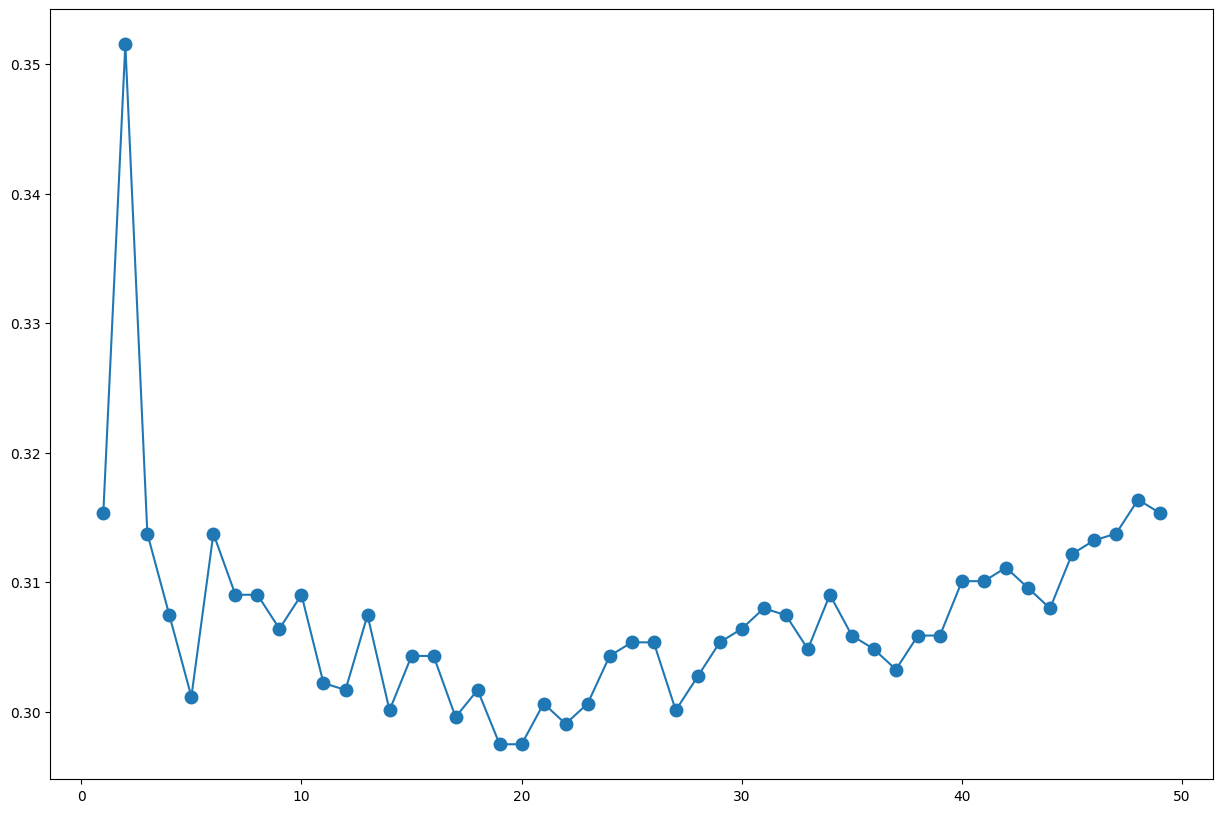

In [35]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [36]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

K-Nearest Neighbors Accuracy Score:  0.6993704092339978

Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.10      0.17       303
           1       0.00      0.00      0.00        20
           2       0.70      0.85      0.77       631
           3       0.71      0.83      0.76       909
           4       0.71      0.28      0.40        43

    accuracy                           0.70      1906
   macro avg       0.52      0.41      0.42      1906
weighted avg       0.67      0.70      0.65      1906



Confusion martrix: 


<Axes: >

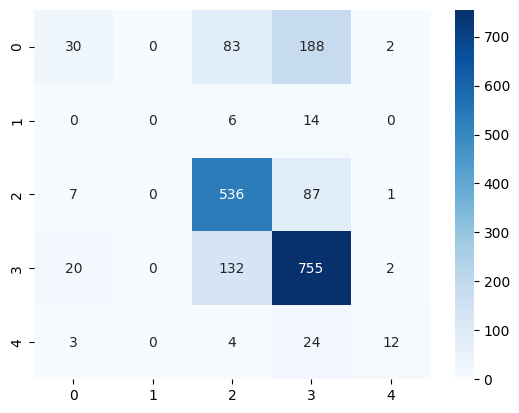

In [37]:
y_predict = knn.predict(X_test)
print('K-Nearest Neighbors Accuracy Score: ', accuracy_score(y_test, y_predict))

print('\nClassification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [38]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('knn.csv', index=False)

### Multinomial Naive Bayes

In [39]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train.toarray(), y_train)

MultinomialNB()

Multinomial Naive Bayes Accuracy Score:  0.7313746065057712

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.13      0.21       303
           1       0.00      0.00      0.00        20
           2       0.80      0.85      0.83       631
           3       0.69      0.90      0.78       909
           4       0.50      0.02      0.04        43

    accuracy                           0.73      1906
   macro avg       0.54      0.38      0.37      1906
weighted avg       0.72      0.73      0.68      1906



Confusion martrix: 


<Axes: >

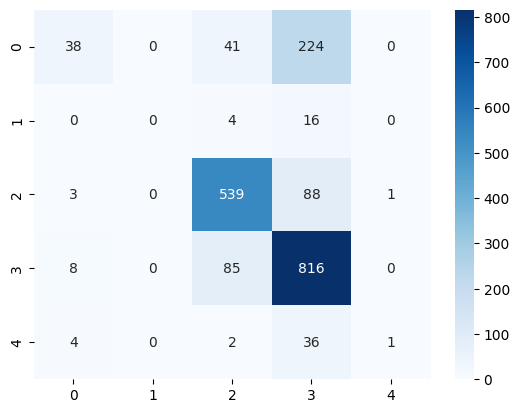

In [40]:
y_predict = multinomial_nb.predict(X_test.toarray())
print('Multinomial Naive Bayes Accuracy Score: ', accuracy_score(y_test, y_predict))

print('\nClassification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [41]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('mnb.csv', index=False)

### Bernoulli Naive Bayes

In [42]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train.toarray(), y_train)

BernoulliNB()

Bernoulli Naive Bayes Accuracy Score:  0.7953830010493179

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       303
           1       1.00      0.05      0.10        20
           2       0.92      0.87      0.89       631
           3       0.78      0.90      0.83       909
           4       0.60      0.28      0.38        43

    accuracy                           0.80      1906
   macro avg       0.78      0.51      0.54      1906
weighted avg       0.79      0.80      0.78      1906



Confusion martrix: 


<Axes: >

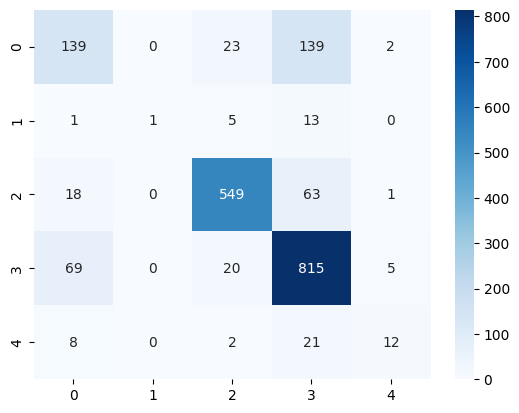

In [43]:
y_predict = bernoulli_nb.predict(X_test.toarray())
print('Bernoulli Naive Bayes Accuracy Score: ', accuracy_score(y_test, y_predict))

print('\nClassification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [44]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('bnb.csv', index=False)

### Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Logistic Regression Accuracy Score:  0.8195173137460651

Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.45      0.54       303
           1       0.00      0.00      0.00        20
           2       0.96      0.87      0.92       631
           3       0.77      0.95      0.85       909
           4       0.90      0.21      0.34        43

    accuracy                           0.82      1906
   macro avg       0.67      0.50      0.53      1906
weighted avg       0.82      0.82      0.80      1906



Confusion martrix: 


<Axes: >

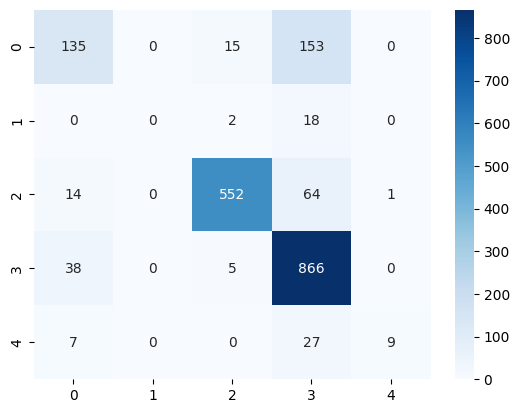

In [46]:
y_predict = lr.predict(X_test)
print('Logistic Regression Accuracy Score: ', accuracy_score(y_test, y_predict))

print('\nClassification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [47]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('lr.csv', index=False)

### Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Accuracy Score:  0.7964323189926548
Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       303
           1       0.42      0.25      0.31        20
           2       0.91      0.87      0.89       631
           3       0.81      0.87      0.84       909
           4       0.55      0.37      0.44        43

    accuracy                           0.80      1906
   macro avg       0.65      0.58      0.60      1906
weighted avg       0.79      0.80      0.79      1906



Confusion martrix: 


<Axes: >

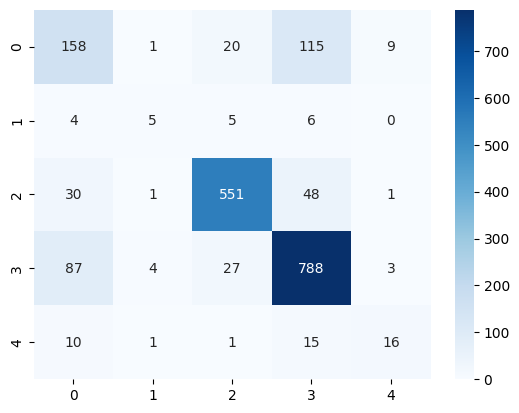

In [49]:
y_predict = dt.predict(X_test)
print('Decision Tree Accuracy Score: ', accuracy_score(y_test, y_predict))

print('Classification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [50]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('dt.csv', index=False)

### Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Accuracy Score:  0.8394543546694648

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.47      0.60       303
           1       1.00      0.10      0.18        20
           2       0.95      0.89      0.92       631
           3       0.79      0.97      0.87       909
           4       0.83      0.23      0.36        43

    accuracy                           0.84      1906
   macro avg       0.88      0.53      0.59      1906
weighted avg       0.85      0.84      0.82      1906



Confusion martrix: 


<Axes: >

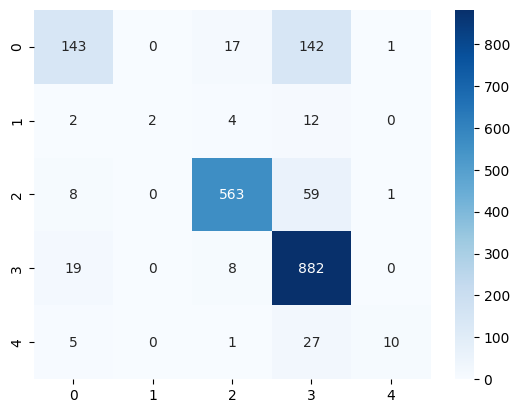

In [52]:
y_predict = rf.predict(X_test)
print('Random Forest Accuracy Score: ', accuracy_score(y_test, y_predict))

print('\nClassification Report: ')
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('\n\nConfusion martrix: ')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [53]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, y_predict, average=None)
arr[1] = recall_score(y_test, y_predict, average=None)
arr[2] = f1_score(y_test, y_predict, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('rf.csv', index=False)

### CNN

In [54]:
df

,Requirement type,Standard Requirements
0,3,game shall developed using unity game engine
1,3,game shall written c# use unity engine-compati...
2,3,game shall feature accurate sound effect music...
3,2,"game 720p resolution, game shall playable"
4,3,game shall playable using mouse keyboard.
...,...,...
9522,2,"3d model,the system shall enable client view a..."
9523,0,"description label tapped,the system shall enab..."
9524,3,system shall enable client rotate 3d object 36...
9525,2,"3d model,the system shall enable client zoom z..."


In [55]:
X = df['Standard Requirements']
y = df['Requirement type']
X.shape, y.shape

((9527,), (9527,))

In [56]:
MAX_VOCAB_SIZE = 1500
MAX_SEQUENCE_LENGTH = 200
EMBEDDING_DIM = 300

def tokenize_data(X_raw):
    tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
    tokenizer.fit_on_texts(X_raw)
    word_index = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(X_raw)
    return sequences, word_index

In [57]:
X, word_index = tokenize_data(X)
X = pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH)
y = y

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7621, 200), (7621,), (1906, 200), (1906,))

In [59]:
cnn_model = Sequential()
cnn_model.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

cnn_model.add(Conv1D(64, 3, padding='same', activation='relu', strides=1))
cnn_model.add(MaxPooling1D(pool_size=5))

cnn_model.add(Conv1D(128, 3, padding='same', activation='relu', strides=1))
cnn_model.add(MaxPooling1D(pool_size=5))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.10))
cnn_model.add(Dense(5, activation='softmax'))

In [60]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
hist = cnn_model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1)

Epoch 1/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.7241 - loss: 0.7680 - val_accuracy: 0.9096 - val_loss: 0.2962
Epoch 2/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9196 - loss: 0.2594 - val_accuracy: 0.9187 - val_loss: 0.2500
Epoch 3/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.9450 - loss: 0.1722 - val_accuracy: 0.9279 - val_loss: 0.2137
Epoch 4/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9668 - loss: 0.1163 - val_accuracy: 0.9332 - val_loss: 0.2251
Epoch 5/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.9794 - loss: 0.0805 - val_accuracy: 0.9384 - val_loss: 0.2319
Epoch 6/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9896 - loss: 0.0444 - val_accuracy: 0.9332 - val_loss: 0.2590
Epoch 7/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9318 - val_loss: 0.3422
Epoch 8/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9929 - loss: 0.0247 - val_acc

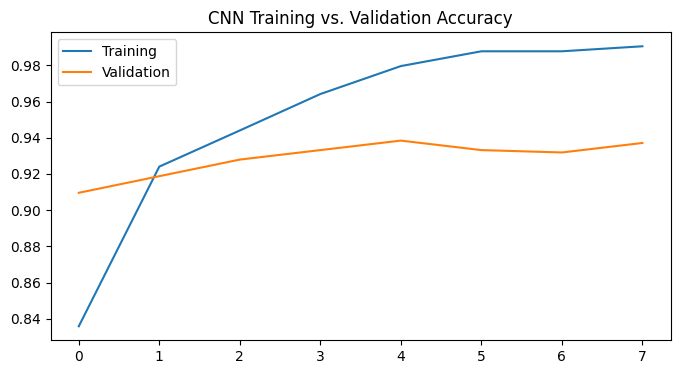

In [63]:
plt.figure(figsize=(8,4))
plt.title('CNN Training vs. Validation Accuracy')
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend(loc='best')
plt.show()

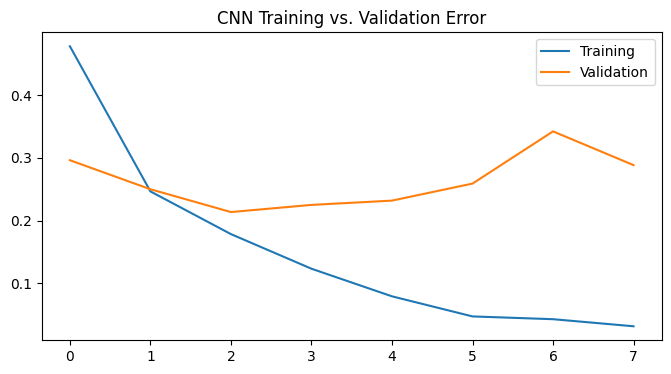

In [64]:
plt.figure(figsize=(8,4))
plt.title('CNN Training vs. Validation Error')
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.legend(loc='best')
plt.show()

In [65]:
cnn_model.evaluate(X_test,  y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9322 - loss: 0.3594


[0.36335769295692444, 0.9286463856697083]

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       270
           1       0.50      0.54      0.52        13
           2       0.96      0.92      0.94       633
           3       0.98      0.98      0.98       949
           4       0.55      0.59      0.56        41

    accuracy                           0.93      1906
   macro avg       0.75      0.77      0.76      1906
weighted avg       0.93      0.93      0.93      1906

Confusion Matrix: 


<Axes: >

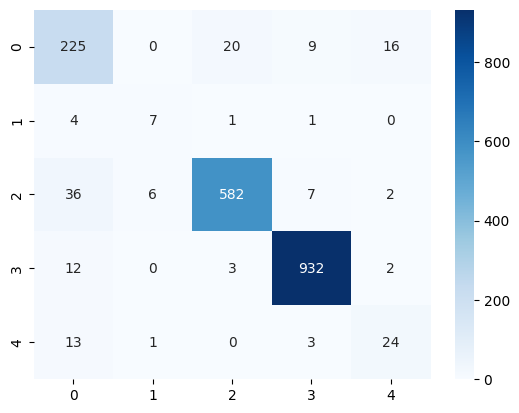

In [66]:
preds = cnn_model.predict(X_test)
preds = np.argmax(preds, axis=1)
print('\nClassification Report: ')
print(classification_report(y_test, preds))
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')

In [67]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, preds, average=None)
arr[1] = recall_score(y_test, preds, average=None)
arr[2] = f1_score(y_test, preds, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('cnn.csv', index=False)

### LSTM

In [68]:
lstm_model = Sequential()
lstm_model.add(Embedding(MAX_VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

lstm_model.add(LSTM(64))


lstm_model.add(Flatten())
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.10))
lstm_model.add(Dense(5, activation='softmax'))

In [69]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
hist = lstm_model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.1)

Epoch 1/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 68s 296ms/step - accuracy: 0.6464 - loss: 0.9388 - val_accuracy: 0.9017 - val_loss: 0.3224
Epoch 2/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 65s 304ms/step - accuracy: 0.9115 - loss: 0.2762 - val_accuracy: 0.9266 - val_loss: 0.2733
Epoch 3/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 83s 309ms/step - accuracy: 0.9398 - loss: 0.1990 - val_accuracy: 0.9187 - val_loss: 0.2691
Epoch 4/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 80s 300ms/step - accuracy: 0.9624 - loss: 0.1233 - val_accuracy: 0.9305 - val_loss: 0.2650
Epoch 5/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 82s 299ms/step - accuracy: 0.9675 - loss: 0.1175 - val_accuracy: 0.9096 - val_loss: 0.2898
Epoch 6/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 83s 304ms/step - accuracy: 0.9756 - loss: 0.0787 - val_accuracy: 0.9253 - val_loss: 0.3261
Epoch 7/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 66s 307ms/step - accuracy: 0.9853 - loss: 0.0488 - val_accuracy: 0.9279 - val_loss: 0.3669
Epoch 8/8
215/215 ━━━━━━━━━━━━━━━━━━━━ 80s 297ms/step - accuracy: 0.9891 - loss: 0.0359 - 

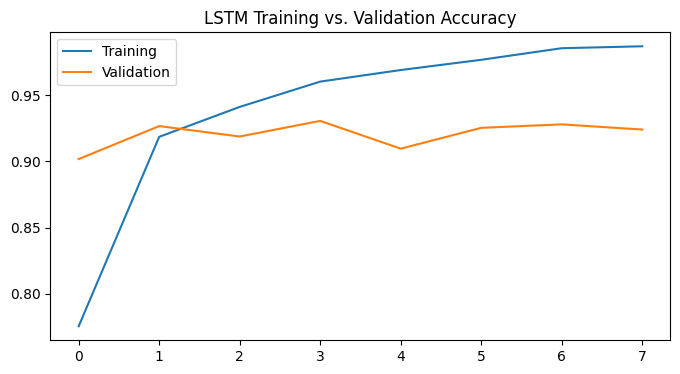

In [72]:
plt.figure(figsize=(8,4))
plt.title('LSTM Training vs. Validation Accuracy')
plt.plot(hist.history['accuracy'], label='Training')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend(loc='best')
plt.show()

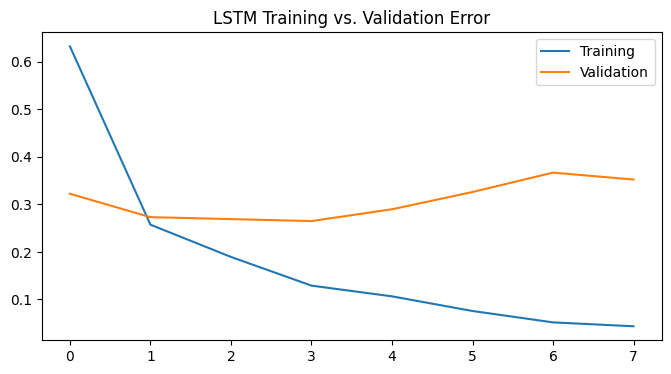

In [73]:
plt.figure(figsize=(8,4))
plt.title('LSTM Training vs. Validation Error')
plt.plot(hist.history['loss'], label='Training')
plt.plot(hist.history['val_loss'], label='Validation')
plt.legend(loc='best')
plt.show()

In [74]:
lstm_model.evaluate(X_test,  y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9155 - loss: 0.3782


[0.3491014838218689, 0.9254984259605408]

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       270
           1       0.50      0.38      0.43        13
           2       0.93      0.93      0.93       633
           3       0.97      0.98      0.98       949
           4       0.61      0.61      0.61        41

    accuracy                           0.93      1906
   macro avg       0.76      0.74      0.75      1906
weighted avg       0.92      0.93      0.92      1906

Confusion Matrix: 


<Axes: >

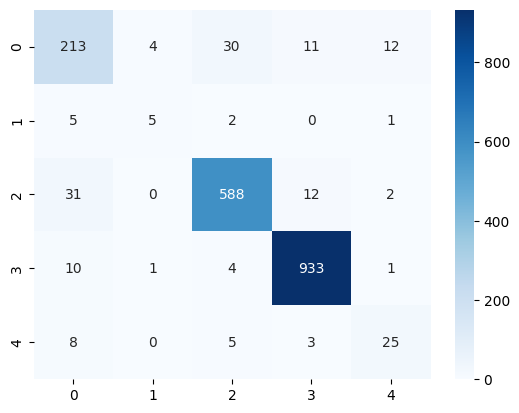

In [75]:
preds = lstm_model.predict(X_test)
preds = np.argmax(preds, axis=1)
print('\nClassification Report: ')
print(classification_report(y_test, preds))
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')

In [76]:
arr = np.empty((3,5))
arr[0] = precision_score(y_test, preds, average=None)
arr[1] = recall_score(y_test, preds, average=None)
arr[2] = f1_score(y_test, preds, average=None)
arr = pd.DataFrame(arr, columns=['event-driven', 'optional-feature', 'state-driven', 'ubiquitous', 'unwanted-behaviour'])
arr.to_csv('lstm.csv', index=False)

In [77]:
knn_f = pd.read_csv('knn.csv')
knn_f
knn = knn_f.T
knn.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

mnb_f = pd.read_csv('mnb.csv')
mnb_f
mnb = mnb_f.T
mnb.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

bnb_f = pd.read_csv('bnb.csv')
bnb_f
bnb = bnb_f.T
bnb.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)


lr_f = pd.read_csv('lr.csv')
lr_f
lr = lr_f.T
lr.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

dt_f = pd.read_csv('dt.csv')
dt_f
dt = dt_f.T
dt.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

rf_f = pd.read_csv('rf.csv')
rf_f
rf = rf_f.T
rf.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

cnn_f = pd.read_csv('cnn.csv')
cnn_f
cnn =cnn_f.T
cnn.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

lstm_f = pd.read_csv('lstm.csv')
lstm_f
lstm = lstm_f.T
lstm.rename(columns = {0:'Precision', 1:'Recall', 2:'F1-Measure'}, inplace = True)

In [78]:
df = pd.concat((knn, mnb, bnb, lr, dt, rf, cnn, lstm), axis=1)
df.columns = ['KNN Precision', 'KNN Recall', 'KNN F1-Score', 'MNB Precision', 'MNB Recall', 'MNB F1-Score', 'BNB Precision', 'BNB Recall', 'BNB F1-Score',  'LR Precision', 'LR Recall', 'LR F1-Score', 'DT Precision', 'DT Recall', 'DT F1-Score', 'RF Precision', 'RF Recall', 'RF F1-Score', 'CNN Precision', 'CNN Recall', 'CNN F1-Score', 'LSTM Precision', 'LSTM Recall', 'LSTM F1-Score']
df

,KNN Precision,KNN Recall,KNN F1-Score,MNB Precision,MNB Recall,MNB F1-Score,BNB Precision,BNB Recall,BNB F1-Score,LR Precision,...,DT F1-Score,RF Precision,RF Recall,RF F1-Score,CNN Precision,CNN Recall,CNN F1-Score,LSTM Precision,LSTM Recall,LSTM F1-Score
event-driven,0.500000,0.099010,0.165289,0.716981,0.125413,0.213483,0.591489,0.458746,0.516729,0.695876,...,0.533784,0.807910,0.471947,0.595833,0.775862,0.833333,0.803571,0.797753,0.788889,0.793296
optional-feature,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,0.095238,0.000000,...,0.312500,1.000000,0.100000,0.181818,0.500000,0.538462,0.518519,0.500000,0.384615,0.434783
state-driven,0.704336,0.849445,0.770115,0.803279,0.854200,0.827957,0.916528,0.870048,0.892683,0.961672,...,0.892308,0.949410,0.892235,0.919935,0.960396,0.919431,0.939467,0.934817,0.928910,0.931854
ubiquitous,0.706929,0.830583,0.763784,0.691525,0.897690,0.781235,0.775452,0.896590,0.831633,0.767730,...,0.837852,0.786096,0.970297,0.868538,0.978992,0.982086,0.980537,0.972888,0.983140,0.977987
unwanted-behaviour,0.705882,0.279070,0.400000,0.500000,0.023256,0.044444,0.600000,0.279070,0.380952,0.900000,...,0.444444,0.833333,0.232558,0.363636,0.545455,0.585366,0.564706,0.609756,0.609756,0.609756


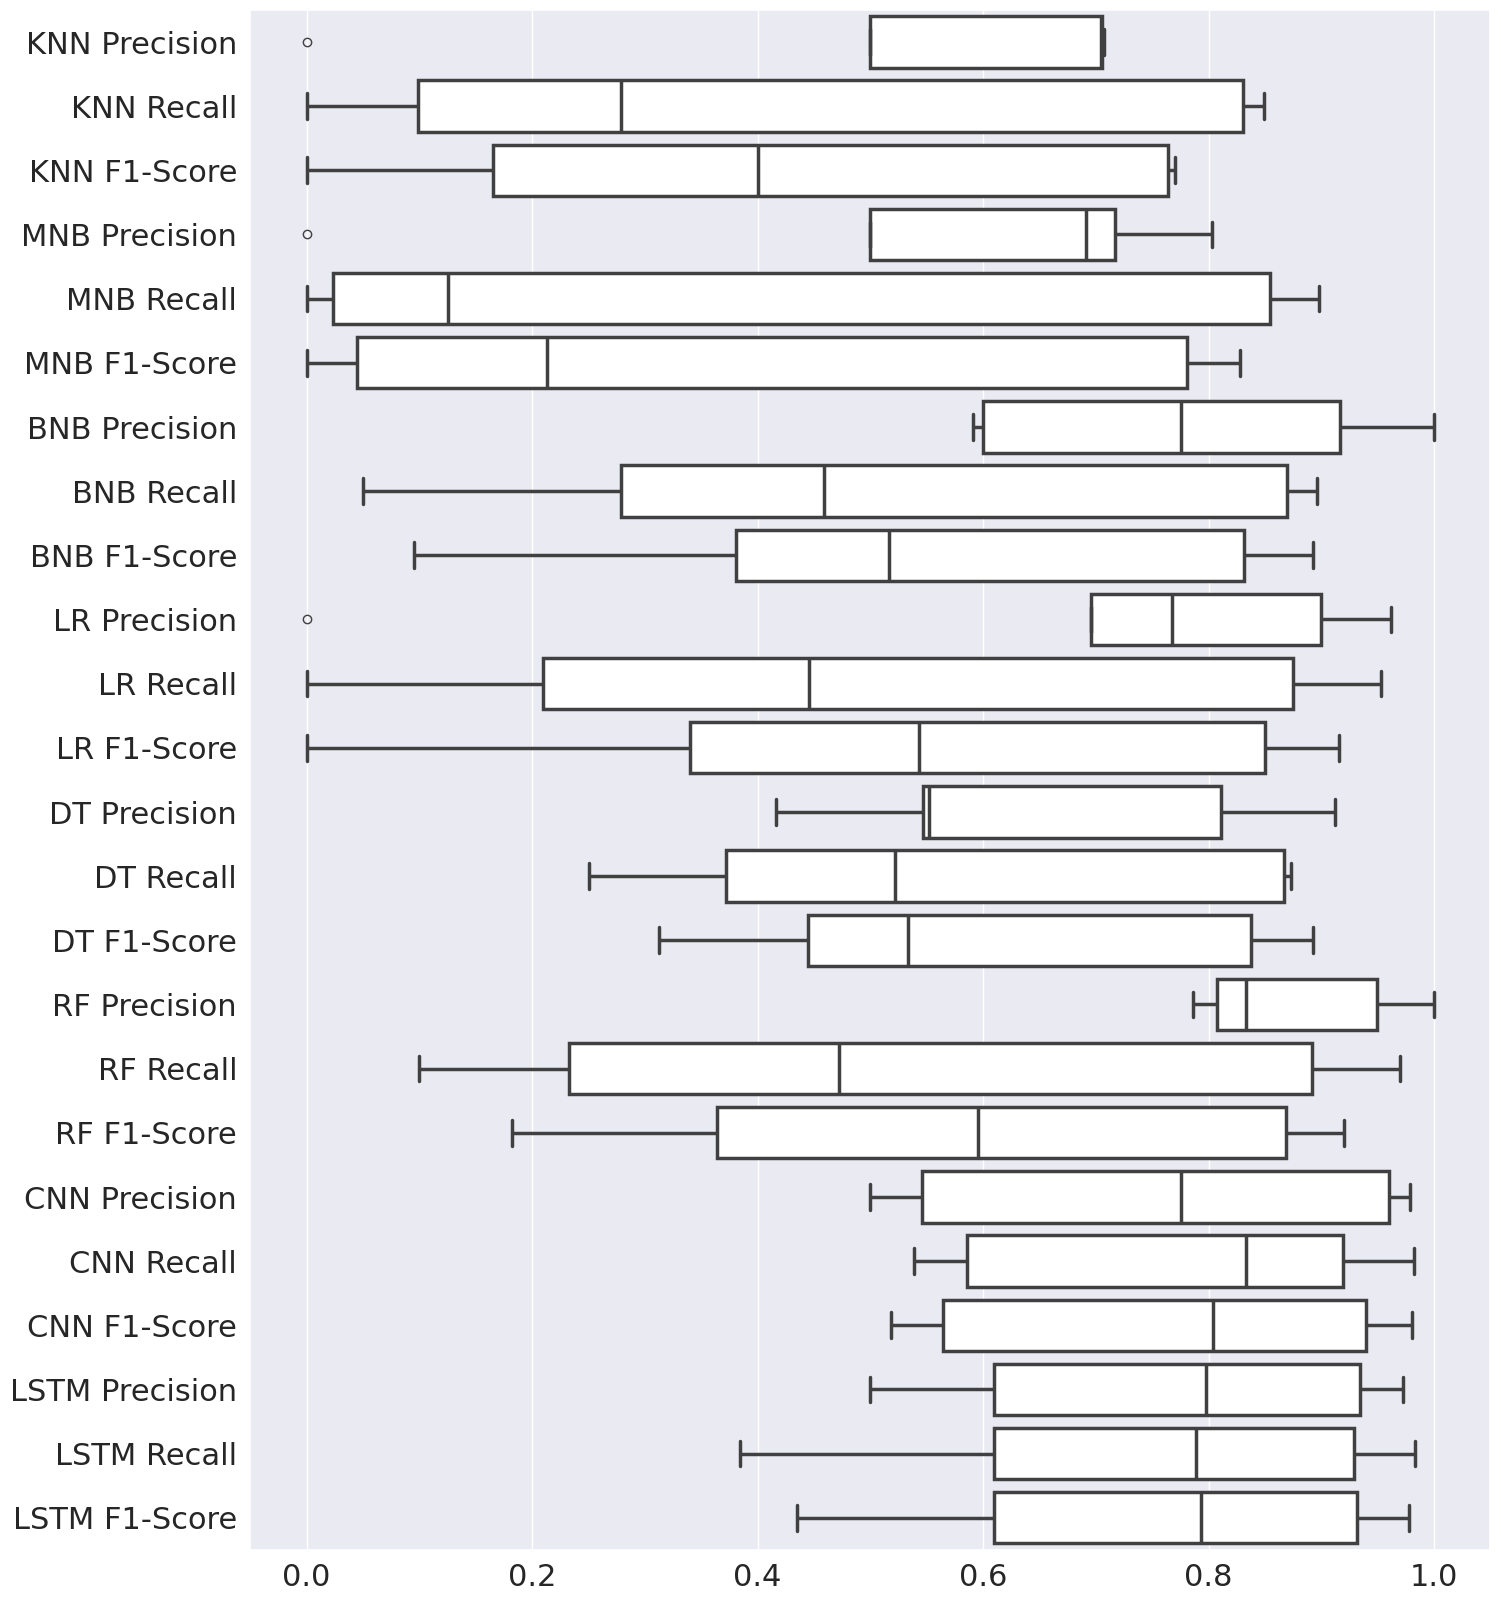

In [79]:
sns.set(font_scale=2)

plt.subplots(figsize=(16, 20))
plt.xticks()
ax = sns.boxplot(data=df, orient='h', linewidth=2.5, color='white' )

In [80]:
df_t = df.T
df_t

,event-driven,optional-feature,state-driven,ubiquitous,unwanted-behaviour
KNN Precision,0.500000,0.000000,0.704336,0.706929,0.705882
KNN Recall,0.099010,0.000000,0.849445,0.830583,0.279070
KNN F1-Score,0.165289,0.000000,0.770115,0.763784,0.400000
MNB Precision,0.716981,0.000000,0.803279,0.691525,0.500000
MNB Recall,0.125413,0.000000,0.854200,0.897690,0.023256
MNB F1-Score,0.213483,0.000000,0.827957,0.781235,0.044444
BNB Precision,0.591489,1.000000,0.916528,0.775452,0.600000
BNB Recall,0.458746,0.050000,0.870048,0.896590,0.279070
BNB F1-Score,0.516729,0.095238,0.892683,0.831633,0.380952
LR Precision,0.695876,0.000000,0.961672,0.767730,0.900000


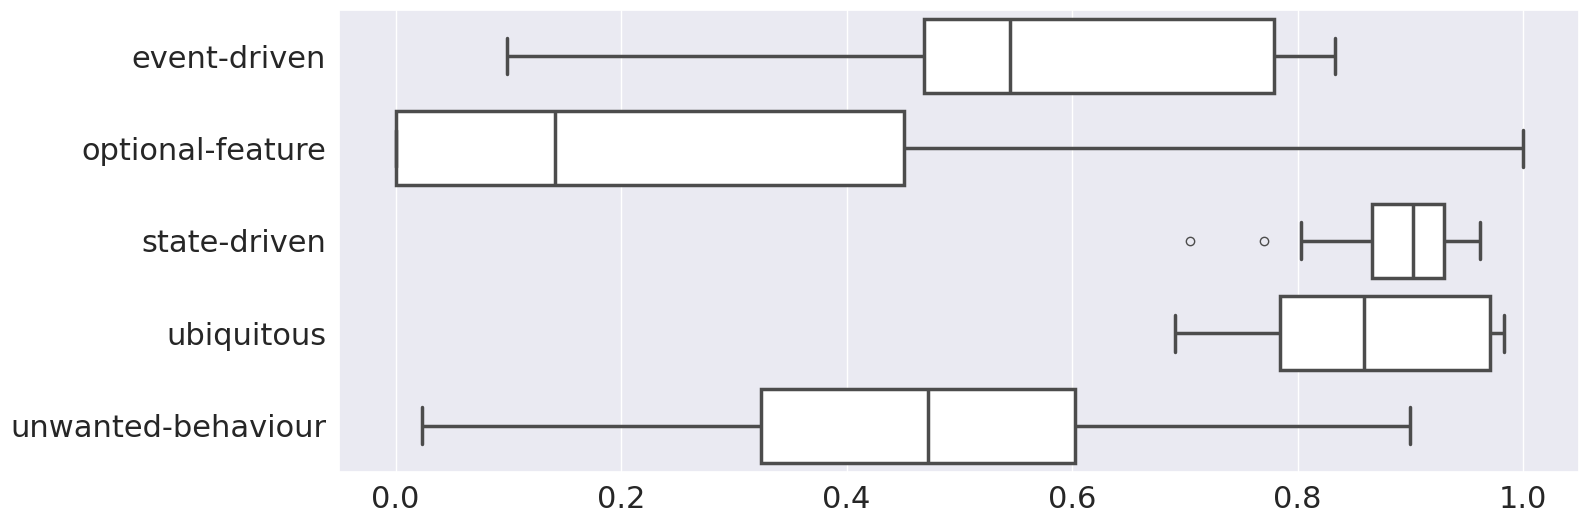

In [81]:
plt.subplots(figsize=(16, 6))
plt.xticks()
ax = sns.boxplot(data=df_t, orient='h', linewidth=2.5, color='white' )

In [82]:
sns.set(font_scale=1)

In [83]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

In [84]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [85]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [86]:
y_pred = cnn_model.predict(X_test)
classes =labelencoder.classes_
classes

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array(['event-driven', 'optional-feature', 'state-driven', 'ubiquitous',
       'unwanted-behaviour'], dtype=object)

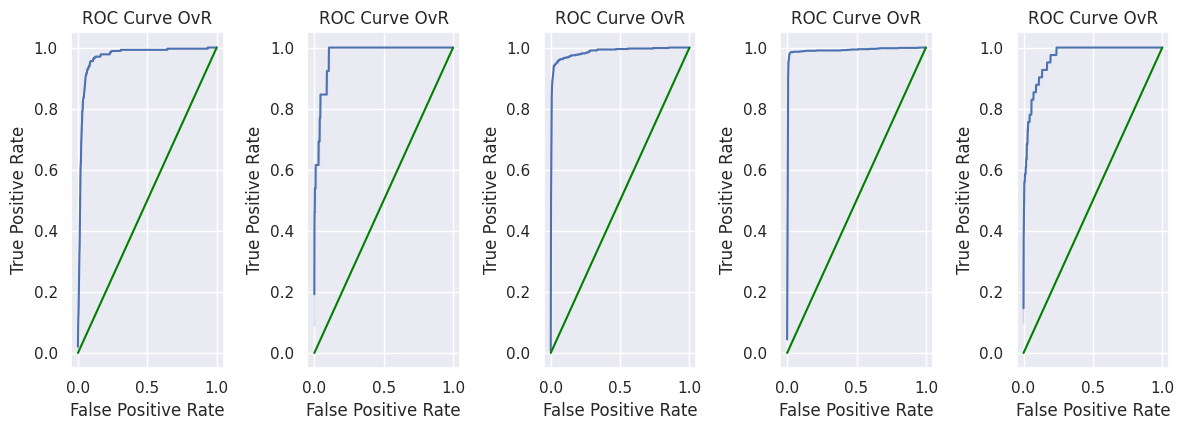

In [87]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    # c = classes[i]
    c = i

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux = pd.DataFrame(df_aux)
    arr = [1 if y == c else 0 for y in y_test]
    df_aux['class'] = arr
    df_aux['prob'] = y_pred[:, i]
    df_aux = df_aux.reset_index(drop = True)



    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.tight_layout()

In [88]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

0 ROC AUC OvR: 0.9685
1 ROC AUC OvR: 0.9756
2 ROC AUC OvR: 0.9851
3 ROC AUC OvR: 0.9898
4 ROC AUC OvR: 0.9667
average ROC AUC OvR: 0.9771


In [89]:
# prompt: I want to download all the files not folders inside the /content folder

import os
import shutil

def download_files_from_folder(folder_path):
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        from google.colab import files
        files.download(file_path)
      except Exception as e:
        print(f"Error downloading {file_path}: {e}")

download_files_from_folder('/content')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MY experiments

In [103]:
df_req = pd.read_csv('req.csv')
df_req

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
1,NaN,NaN
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [104]:
df_req.dropna(inplace=True)
df_req

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
5,ubiquitous,The game shall be playable using mouse and key...
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [92]:
df_req.dropna(inplace=True)
df_req

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
5,ubiquitous,The game shall be playable using mouse and key...
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [105]:
df_req['Requirement type'] = df_req['Requirement type'].str.strip().str.lower()

df_req

,Requirement type,Standard Requirements
0,ubiquitous,The game shall be developed using unity game e...
2,ubiquitous,The game shall be written in C# and use Unity ...
3,ubiquitous,The Game shall feature accurate sound effects ...
4,state driven,"while the game have 720p resolution, the game ..."
5,ubiquitous,The game shall be playable using mouse and key...
...,...,...
9674,state driven,"while there is 3D model,The system shall enabl..."
9675,event driven,"when the description of the label is tapped,Th..."
9676,ubiquitous,The system shall enable client to rotate the 3...
9677,state driven,"while there is 3D model,The system shall enabl..."


In [95]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 10.4 MB/s eta 0:00:00


In [106]:
# prompt: Using dataframe df_req: Use sentence transformers to embed all the requirement types in the vector space

from sentence_transformers import SentenceTransformer

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Extract the unique requirement types
requirement_types = df_req['Requirement type'].unique()


# Embed the requirement types using the Sentence Transformer model
embeddings = model.encode(requirement_types.tolist())

# You can now use the 'embeddings' variable for further analysis or tasks.
# For example, you could perform clustering, similarity search, or other vector-based operations.

# Print the shape of the embeddings to verify the process
print(embeddings.shape)


(6, 768)


In [107]:
requirement_types

array(['ubiquitous', 'state driven', 'event driven', 'unwanted behaviour',
       'optional feature', 'unwanted'], dtype=object)

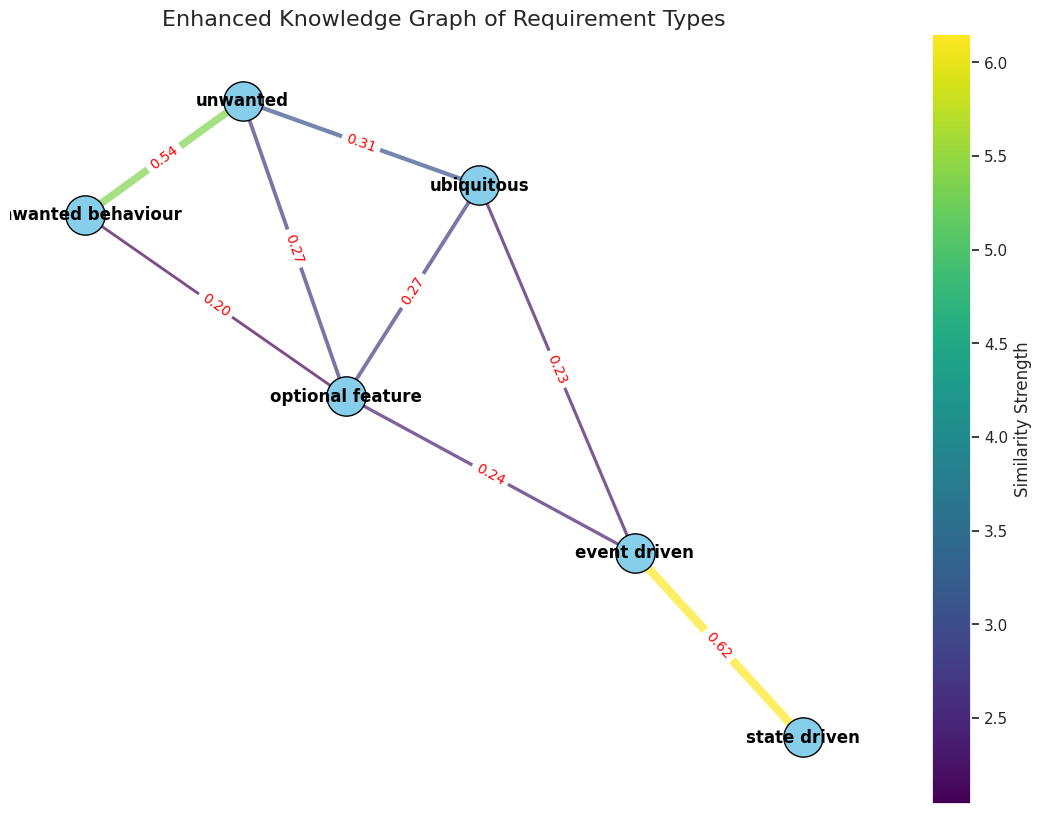

In [108]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Step 1: Compute the similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Step 2: Build the graph
# Create a graph object
G = nx.Graph()

# Add nodes with requirement types as labels
for i, req_type in enumerate(requirement_types):
    G.add_node(i, label=req_type)

# Define a threshold to consider connections
similarity_threshold = 0.2  # Adjust this value based on your data and preference

# Add edges based on the similarity threshold
for i in range(len(requirement_types)):
    for j in range(i + 1, len(requirement_types)):
        if similarity_matrix[i, j] > similarity_threshold:
            G.add_edge(i, j, weight=similarity_matrix[i, j])

# Step 3: Visualize the graph
plt.figure(figsize=(14, 10))

# Define positions for all nodes using spring layout for better visualization
pos = nx.spring_layout(G, seed=42, k=0.5)  # k adjusts the space between nodes

# Draw nodes with customized appearance
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue', edgecolors='black')

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, labels={i: req for i, req in enumerate(requirement_types)},
                        font_size=12, font_color='black', font_weight='bold')

# Draw edges with varying thickness and color based on the similarity weight
edges = [(u, v) for u, v, w in G.edges(data=True) if w['weight'] > similarity_threshold]
weights = [G[u][v]['weight'] * 10 for u, v in edges]  # Scale edge width based on weight

# Normalize edge weights for color mapping
norm = plt.Normalize(vmin=min(weights), vmax=max(weights))
colors = [plt.cm.viridis(norm(weight)) for weight in weights]

nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color=colors, alpha=0.7)

# Add edge labels to show similarity scores
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5, font_color='red')

plt.title('Enhanced Knowledge Graph of Requirement Types', fontsize=16)
plt.axis('off')  # Turn off axis
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), label='Similarity Strength')
plt.show()

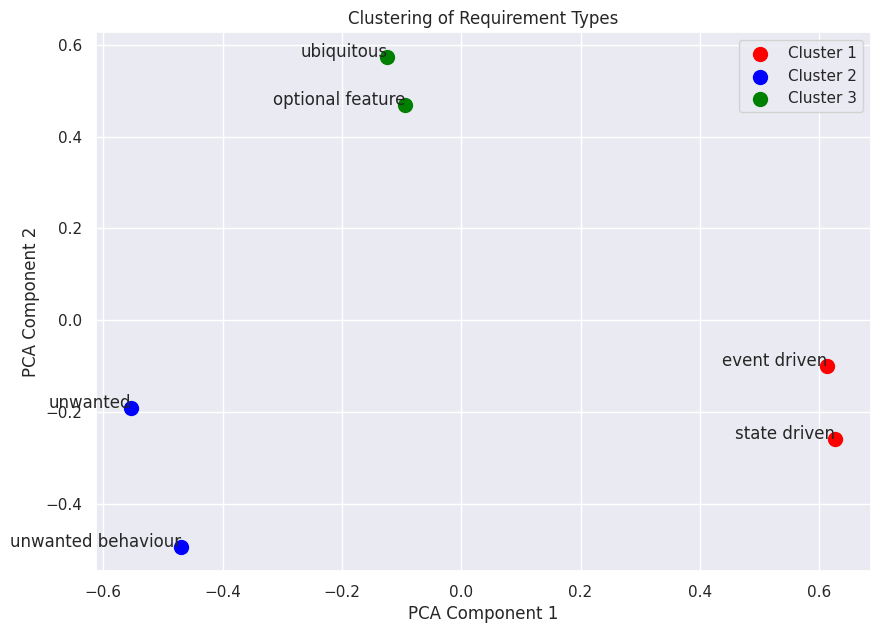

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean and prepare the data
# Extract relevant columns, drop missing values, and clean text
df_clean = df_req[['Requirement type', 'Standard Requirements']].dropna()
# df_clean['Type'] = df_clean['Type'].str.strip().str.lower()
# df_clean['Requirement with Standard Syntax'] = df_clean['Requirement with Standard Syntax'].str.strip()

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Embed the 'Type' and 'Requirement with Standard Syntax' columns
type_embeddings = model.encode(df_clean['Requirement type'].tolist())
syntax_embeddings = model.encode(df_clean['Standard Requirements'].tolist())

# Combine embeddings for visualization
combined_embeddings = np.concatenate((type_embeddings, syntax_embeddings), axis=0)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(combined_embeddings)

# Split reduced embeddings back into 'Type' and 'Requirement with Standard Syntax' for plotting
type_reduced = reduced_embeddings[:len(type_embeddings)]
syntax_reduced = reduced_embeddings[len(type_embeddings):]

# Plot the reduced embeddings to visualize the latent space mapping
plt.figure(figsize=(14, 10))

# Plot 'Type' embeddings
plt.scatter(type_reduced[:, 0], type_reduced[:, 1], color='blue', label='Type Embeddings', alpha=0.7)

# Plot 'Requirement with Standard Syntax' embeddings
plt.scatter(syntax_reduced[:, 0], syntax_reduced[:, 1], color='red', label='Standard Syntax Embeddings', alpha=0.7)

plt.title('Latent Space Mapping of Requirement Types and Standard Syntax Requirements')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data cleaning
df_clean = df_req[['Requirement type', 'Standard Requirements']].dropna()
# df_clean['Type'] = df_clean['Type'].str.strip().str.lower()
# df_clean['Requirement with Standard Syntax'] = df_clean['Requirement with Standard Syntax'].str.strip()

# Load pre-trained Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

# Clean and find unique requirement types
unique_types = df_clean['Requirement type'].unique()

# Initialize plot
plt.figure(figsize=(14, 10))

# Loop through each unique requirement type
for unique_type in unique_types:
    # Filter standardized requirements related to this unique type
    filtered_df = df_clean[df_clean['Type'] == unique_type]

    # If no associated standardized requirements are found, skip
    if filtered_df.empty:
        continue

    # Embed the unique requirement type once
    type_embedding = model.encode([unique_type])

    # Embed the associated standardized requirements
    syntax_embeddings = model.encode(filtered_df['Standard Requirements'].tolist())

    # Combine the type embedding with its corresponding standard syntax embeddings
    combined_embeddings = np.concatenate((type_embedding, syntax_embeddings), axis=0)

    # Reduce dimensions using PCA for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(combined_embeddings)

    # Plot unique requirement type
    plt.scatter(reduced_embeddings[0, 0], reduced_embeddings[0, 1], color='blue', s=150, label=f'{unique_type} (Type)')

    # Plot associated standardized requirements
    plt.scatter(reduced_embeddings[1:, 0], reduced_embeddings[1:, 1], color='red', s=100, alpha=0.6, label=f'{unique_type} (Standard Syntax)')

# Set plot details
plt.title('Latent Space Mapping of Each Unique Requirement Type with Standard Syntax Requirements')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()
